In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("database.csv")

In [2]:
#Mostrar colunas existentes no DF original
df.columns

Index(['Carimbo de data/hora', 'Qual seu curso atual/formação?',
       'Qual semestre você esta?',
       'Quais os principais motivos para escolher seu curso?',
       'Você sente que atendeu suas expectativas iniciais?',
       'Você pesquisou sobre o curso antes de fazer sua escolha?',
       'Você sentiu alguma incerteza ao escolher o curso?',
       'Quais foram os principais fatores de incerteza? (Marque todos os que se aplicam)',
       'Você se arrepende de ter escolhido seu curso?',
       'Se sim, quais são os principais motivos do arrependimento? (Marque todos os que se aplicam)  ',
       'Você já considerou mudar de curso?',
       'Se sim, quais são os principais fatores que influenciam sua decisão de permanecer ou mudar de curso? (Marque todos os que se aplicam)  '],
      dtype='object')

In [3]:
# Renomeando as colunas
df_nomes_corretos = df.rename( columns={
    "Carimbo de data/hora" : "data_hora",
    "Qual seu curso atual/formação?" : "curso",
    "Qual semestre você esta?" : "semestre_atual",
    "Quais os principais motivos para escolher seu curso?" : "motivo_que_escolhi_curso",
    "Você sente que atendeu suas expectativas iniciais?" : "atendeu_expectativas",
    "Você pesquisou sobre o curso antes de fazer sua escolha?" : "pesquisou_antes_de_escolher",
    "Você sentiu alguma incerteza ao escolher o curso?" : "incerteza_escolher_curso",
    "Quais foram os principais fatores de incerteza? (Marque todos os que se aplicam)" : "fatores_incerteza",
    "Você se arrepende de ter escolhido seu curso?" : "se_arrepende",
    "Se sim, quais são os principais motivos do arrependimento? (Marque todos os que se aplicam)  " : "motivos_arrependimento",
    "Você já considerou mudar de curso?" : "trocar_curso",
    "Se sim, quais são os principais fatores que influenciam sua decisão de permanecer ou mudar de curso? (Marque todos os que se aplicam)  " : "motivos_trocar_curso"
})

#Alterando nome dos cursos
df_nomes_corretos["curso"] = df_nomes_corretos["curso"].replace({
    "Ciências Humanas (História, Geografia, Psicologia, etc.)" : "Ciências Humanas",
    "Tecnologia (Computação, Engenharia, etc.)" : "Tecnologia",
    "Ciências Sociais Aplicadas (Administração, Direito, Economia, etc.)" : "Ciências Sociais Aplicadas",
    "Artes e Comunicação (Design, Jornalismo, Publicidade, etc.)" : "Artes e Comunicação",
    "Ciências Exatas (Matemática, Física, Química, etc.)" : "Ciências Exatas",
    "Ciências Biológicas (Biologia, Medicina, Enfermagem, etc.)" : "Ciências Biológicas"
})

# Deixando todos os números da coluna como string para evitar incoerências
df_nomes_corretos["atendeu_expectativas"] = df_nomes_corretos["atendeu_expectativas"].astype(str).str.strip()
df_nomes_corretos["pesquisou_antes_de_escolher"] = df_nomes_corretos["pesquisou_antes_de_escolher"].astype(str).str.strip()
df_nomes_corretos["incerteza_escolher_curso"] = df_nomes_corretos["incerteza_escolher_curso"].astype(str).str.strip()
df_nomes_corretos["se_arrepende"] = df_nomes_corretos["se_arrepende"].astype(str).str.strip()
df_nomes_corretos["trocar_curso"] = df_nomes_corretos["trocar_curso"].astype(str).str.strip()

In [4]:
df_nomes_corretos["curso"].unique()

array(['Ciências Humanas', 'Tecnologia', 'Ciências Biológicas', 'Outros',
       'Ciências Sociais Aplicadas', 'Artes e Comunicação',
       'Ciências Exatas'], dtype=object)

In [5]:
# Formatando dados da coluna atendeu expectativas
df_nomes_corretos["atendeu_expectativas"] = df_nomes_corretos["atendeu_expectativas"].replace({
    "1": "Não atendeu",
    "2": "Não atendeu",
    "3": "Pouco atendeu",
    "4": "Pouco atendeu",
    "5": "Neutro",
    "6": "Neutro",
    "7": "Atendeu",
    "8": "Atendeu",
    "9": "Atendeu muito bem",
    "10": "Atendeu muito bem"
})

# Formatando dados da coluna pesquisou_antes_de_escolher
df_nomes_corretos["pesquisou_antes_de_escolher"] = df_nomes_corretos["pesquisou_antes_de_escolher"].replace({
    "1": "Muito pouco pesquisado",
    "2": "Muito pouco pesquisado",
    "3": "Pouco pesquisado",
    "4": "Pouco pesquisado",
    "5": "Neutro",
    "6": "Neutro",
    "7": "Bem pesquisado",
    "8": "Bem pesquisado",
    "9": "Muito bem pesquisado",
    "10": "Muito bem pesquisado"
})

# Formatando dados da coluna df_nomes_corretos
df_nomes_corretos["incerteza_escolher_curso"] = df_nomes_corretos["incerteza_escolher_curso"].replace({
    "1": "Muito incerto",
    "2": "Muito incerto",
    "3": "Incerto",
    "4": "Incerto",
    "5": "Neutro",
    "6": "Neutro",
    "7": "Certo",
    "8": "Certo",
    "9": "Muito certo",
    "10": "Muito certo"
})

df_nomes_corretos["se_arrepende"] = df_nomes_corretos["se_arrepende"].replace({
    "1": "Não me arrependo",
    "2": "Não me arrependo",
    "3": "Pouco arrependido",
    "4": "Pouco arrependido",
    "5": "Neutro",
    "6": "Neutro",
    "7": "Arrependido",
    "8": "Arrependido",
    "9": "Muito arrependido",
    "10": "Muito arrependido"
})

df_nomes_corretos["trocar_curso"] = df_nomes_corretos["trocar_curso"].replace({
    "1": "Nunca considerei",
    "2": "Nunca considerei",
    "3": "Pouco provável",
    "4": "Pouco provável",
    "5": "Neutro",
    "6": "Neutro",
    "7": "Provável",
    "8": "Provável",
    "9": "Muito provável",
    "10": "Muito provável"
})


In [6]:
df_nomes_corretos["data_hora"] = pd.to_datetime(df_nomes_corretos["data_hora"]).dt.date

C:\Users\marco\AppData\Local\Temp\ipykernel_3324\812062601.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_nomes_corretos["data_hora"] = pd.to_datetime(df_nomes_corretos["data_hora"]).dt.date


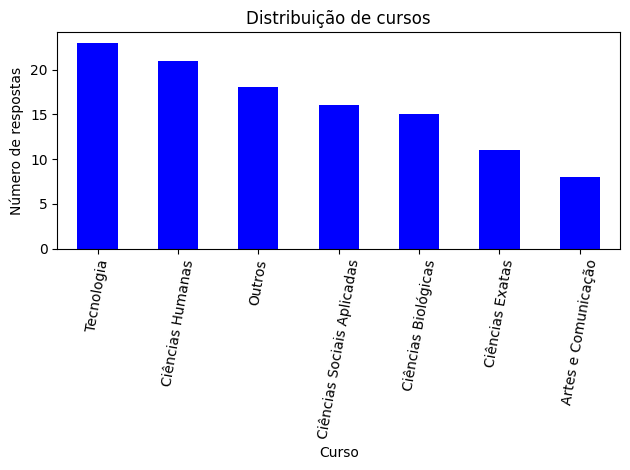

In [7]:
df_nomes_corretos["curso"].value_counts().plot(kind='bar', color='blue')
plt.title("Distribuição de cursos")
plt.xlabel("Curso")
plt.ylabel("Número de respostas")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

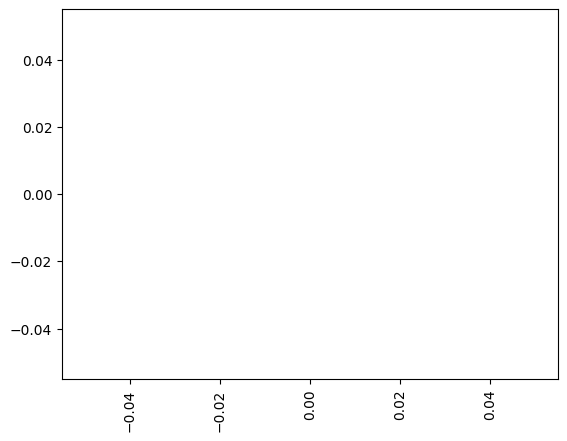

In [8]:
df_nomes_corretos["atendeu_expectativas"] = pd.to_numeric(df_nomes_corretos["atendeu_expectativas"], errors='coerce')

df_nomes_corretos["atendeu_expectativas"].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Atendeu às expectativas iniciais?")
plt.xlabel("""1 - 2: Não atendeu\n3 - 4: Pouco atendeu\n5 - 6: Neutro\n7 - 8: Atendeu\n9 - 10: Atendeu muito bem""")
plt.ylabel("Quantidade de respostas")
plt.xticks(rotation=0)
plt.axhline(y=5, color='red', linestyle='-.')
plt.axhline(y=10, color='red', linestyle='dotted')
plt.axhline(y=15, color='red', linestyle='-')
plt.axhline(y=20, color='red', linestyle='--')
plt.axhline(y=25, color='red', linestyle='--')
plt.tight_layout()
plt.show()